# Author: Brandonlee Santos 
# Kaggle Competition

- You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

# File descriptions

- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- sample_submission.csv - a sample submission file in the correct format.
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

# Loading and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fut=pd.read_csv('competitive-data-science-predict-future-sales/sales_train.csv')
ite=pd.read_csv('competitive-data-science-predict-future-sales/items.csv')
shope=pd.read_csv('competitive-data-science-predict-future-sales/shops.csv')
cat=pd.read_csv('competitive-data-science-predict-future-sales/item_categories.csv')
testf=pd.read_csv('competitive-data-science-predict-future-sales/test.csv')

In [3]:
fut.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [4]:
fut.values.shape

(2935849, 6)

In [5]:
fut.drop_duplicates().values.shape

(2935843, 6)

In [6]:
fut=fut.drop_duplicates()

In [7]:
fut.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06
mean,1.456991e+01,3.300171e+01,1.019723e+04,8.908535e+02,1.242641e+00
std,9.422992e+00,1.622698e+01,6.324293e+03,1.729801e+03,2.618837e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [8]:
testf.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [9]:
fut.tail(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935839,24.10.2015,33,25,7315,399.0,1.0
2935840,31.10.2015,33,25,7409,299.0,1.0
2935841,11.10.2015,33,25,7393,349.0,1.0
2935842,10.10.2015,33,25,7384,749.0,1.0
2935843,09.10.2015,33,25,7409,299.0,1.0
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [10]:
testf.tail(10)

,ID,shop_id,item_id
214190,214190,45,3280
214191,214191,45,4393
214192,214192,45,4352
214193,214193,45,18049
214194,214194,45,18027
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648
214199,214199,45,969


In [11]:
fut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935843 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 156.8+ MB


In [12]:
testf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [13]:
ite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [14]:
shope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [15]:
fut.item_id.nunique()

21807

In [16]:
fut.shop_id.nunique()

60

In [17]:
cat.item_category_id.nunique()

84

In [18]:
cat.item_category_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [19]:
fut["revenue_each_item"]=fut["item_cnt_day"]*fut["item_price"]

# Merging

In [20]:
itedict=ite.drop('item_category_id',axis=1).set_index('item_id').T.to_dict('list')
itedict2=ite.drop('item_name',axis=1).set_index('item_id').T.to_dict('list')
shopedict=shope.set_index('shop_id').T.to_dict('list')
catdict=cat.set_index('item_category_id').T.to_dict('list')

In [21]:
fut['item_id_name']=fut['item_id']
fut['shop_id_name']=fut['shop_id']
fut['item_category_id']=fut['shop_id']
fut['item_category_name']=fut['item_category_id']

fut['item_id_name']=fut['item_id_name'].map(itedict)
fut['item_category_id']=fut['item_category_id'].map(itedict2)
fut['shop_id_name']=fut['shop_id_name'].map(shopedict)
fut['item_category_name']=fut['item_category_name'].map(catdict)

In [22]:
fut[['item_id_name','shop_id_name','item_category_name']]=fut[['item_id_name','shop_id_name','item_category_name']].astype(str)

In [23]:
fut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935843 entries, 0 to 2935848
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   revenue_each_item   float64
 7   item_id_name        object 
 8   shop_id_name        object 
 9   item_category_id    object 
 10  item_category_name  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 268.8+ MB


In [24]:
fut.date=pd.to_datetime(fut.date)
fut['day']=fut.date.dt.day
fut['month']=fut.date.dt.month
fut['year']=fut.date.dt.year

In [25]:
fut

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue_each_item,item_id_name,shop_id_name,item_category_id,item_category_name,day,month,year
0,2013-02-01,0,59,22154,999.00,1.0,999.00,['ЯВЛЕНИЕ 2012 (BD)'],"['Ярославль ТЦ ""Альтаир""']",[57],['Музыка - Музыкальное видео'],1,2,2013
1,2013-03-01,0,25,2552,899.00,1.0,899.00,['DEEP PURPLE The House Of Blue Light LP'],"['Москва ТРК ""Атриум""']",[40],['Игры - Аксессуары для игр'],1,3,2013
2,2013-05-01,0,25,2552,899.00,-1.0,-899.00,['DEEP PURPLE The House Of Blue Light LP'],"['Москва ТРК ""Атриум""']",[40],['Игры - Аксессуары для игр'],1,5,2013
3,2013-06-01,0,25,2554,1709.05,1.0,1709.05,['DEEP PURPLE Who Do You Think We Are LP'],"['Москва ТРК ""Атриум""']",[40],['Игры - Аксессуары для игр'],1,6,2013
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,['DEEP PURPLE 30 Very Best Of 2CD (Фирм.)'],"['Москва ТРК ""Атриум""']",[40],['Игры - Аксессуары для игр'],15,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,299.00,['V/A Nu Jazz Selection (digipack)'],"['Москва ТРК ""Атриум""']",[40],['Игры - Аксессуары для игр'],10,10,2015
2935845,2015-09-10,33,25,7460,299.00,1.0,299.00,['V/A The Golden Jazz Collection 1 2CD'],"['Москва ТРК ""Атриум""']",[40],['Игры - Аксессуары для игр'],10,9,2015
2935846,2015-10-14,33,25,7459,349.00,1.0,349.00,['V/A The Best Of The 3 Tenors'],"['Москва ТРК ""Атриум""']",[40],['Игры - Аксессуары для игр'],14,10,2015
2935847,2015-10-22,33,25,7440,299.00,1.0,299.00,['V/A Relax Collection Planet MP3 (mp3-CD) (j...,"['Москва ТРК ""Атриум""']",[40],['Игры - Аксессуары для игр'],22,10,2015


# EDA
- Histogram 
- Scatter Plot
- BoxPlot/ Violen
- Correlation/ Covar

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'date_block_num'}>,
        <AxesSubplot:title={'center':'shop_id'}>],
       [<AxesSubplot:title={'center':'item_id'}>,
        <AxesSubplot:title={'center':'item_price'}>,
        <AxesSubplot:title={'center':'item_cnt_day'}>],
       [<AxesSubplot:title={'center':'revenue_each_item'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

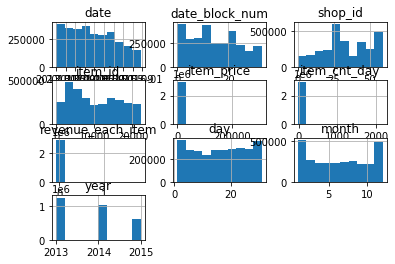

In [26]:
fut.hist()

<AxesSubplot:xlabel='day', ylabel='count'>

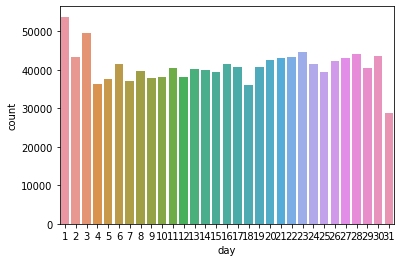

In [27]:
sns.countplot(x=fut[fut['year']==2013]['day'])

<AxesSubplot:xlabel='day', ylabel='count'>

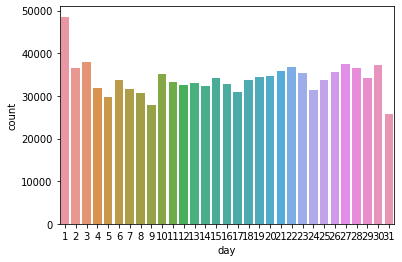

In [28]:
sns.countplot(x=fut[fut['year']==2014]['day'])

<AxesSubplot:xlabel='day', ylabel='count'>

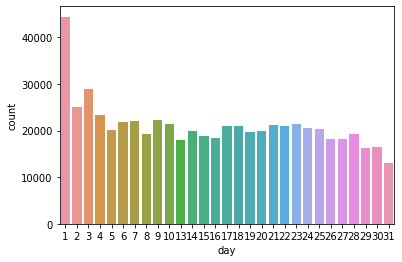

In [29]:
sns.countplot(x=fut[fut['year']==2015]['day'])

<AxesSubplot:xlabel='month', ylabel='count'>

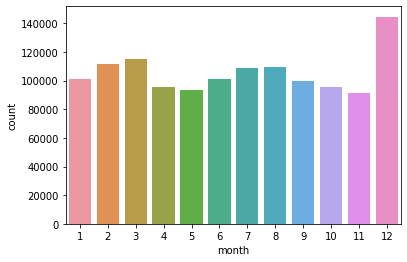

In [30]:
sns.countplot(x=fut[fut['year']==2013]['month'])

<AxesSubplot:xlabel='month', ylabel='count'>

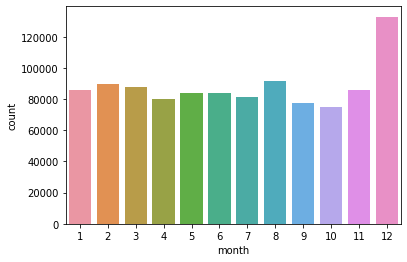

In [31]:
sns.countplot(x=fut[fut['year']==2014]['month'])

<AxesSubplot:xlabel='month', ylabel='count'>

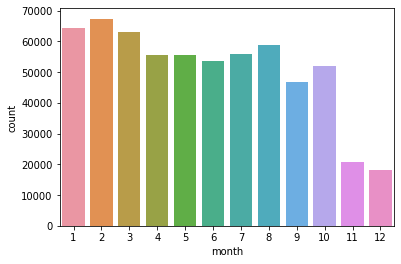

In [32]:
sns.countplot(x=fut[fut['year']==2015]['month'])

<AxesSubplot:xlabel='year', ylabel='count'>

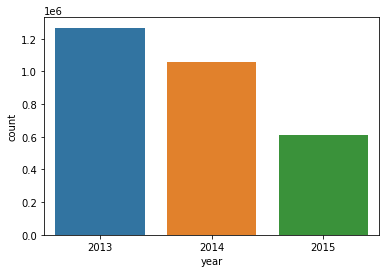

In [33]:
sns.countplot(x=fut['year'])

<AxesSubplot:xlabel='year', ylabel='item_price'>

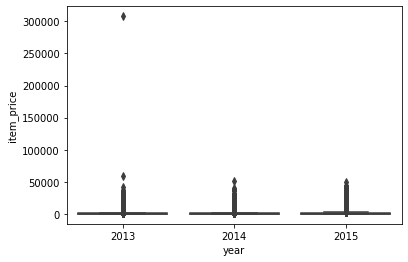

In [34]:
sns.boxplot(x="year",y="item_price", data=fut)

<AxesSubplot:xlabel='month', ylabel='item_price'>

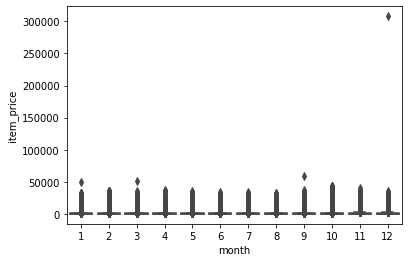

In [35]:
sns.boxplot(x="month",y="item_price", data=fut)

<AxesSubplot:xlabel='day', ylabel='item_price'>

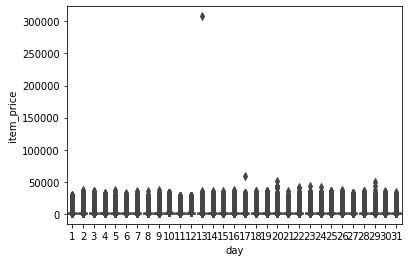

In [36]:
sns.boxplot(x="day",y="item_price", data=fut)

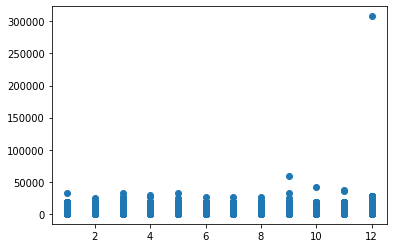

In [37]:
plt.figure()
plt.scatter(fut[fut.year==2013].month,fut[fut.year==2013].item_price)

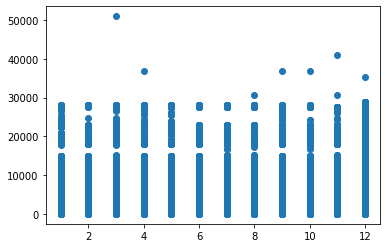

In [38]:
plt.figure()
plt.scatter(fut[fut.year==2014].month,fut[fut.year==2014].item_price)

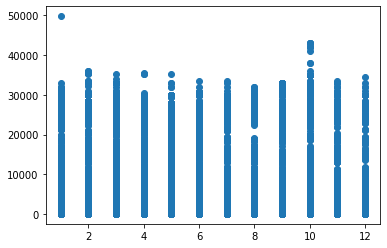

In [39]:
plt.figure()
plt.scatter(fut[fut.year==2015].month,fut[fut.year==2015].item_price)

<AxesSubplot:xlabel='date', ylabel='item_cnt_day'>

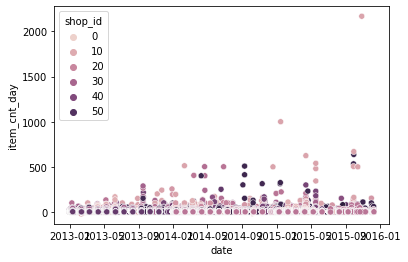

In [40]:
sns.scatterplot(x="date",y="item_cnt_day",data=fut,hue ="shop_id")

In [41]:
fut[fut.year==2015].month.max()

12

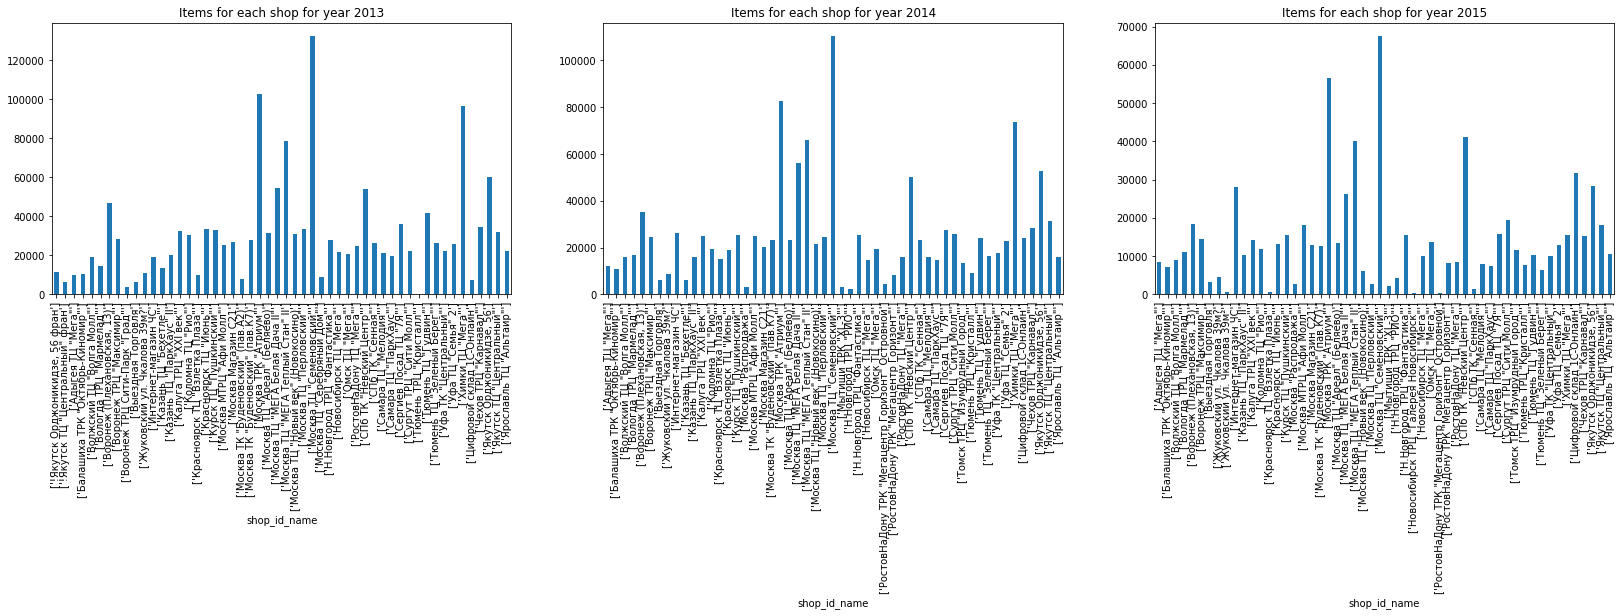

In [42]:
import numpy as np
fig, axs =plt.subplots(1,3)

for e,i in enumerate(np.arange(2013,2016,1)):
    fut[fut['date'].dt.year==i].groupby('shop_id_name')['item_cnt_day'].sum().plot(kind='bar',ax=axs[e],figsize=(28,5),title='Items for each shop for year '+str(i))

<AxesSubplot:xlabel='shop_id_name'>

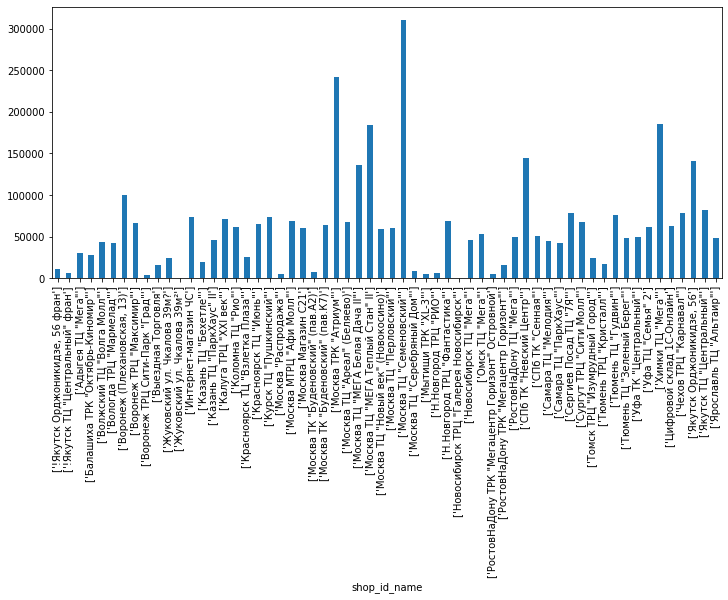

In [43]:
plt.figure(figsize=(12,5))
fut.groupby('shop_id_name')['item_cnt_day'].sum().plot(kind='bar')

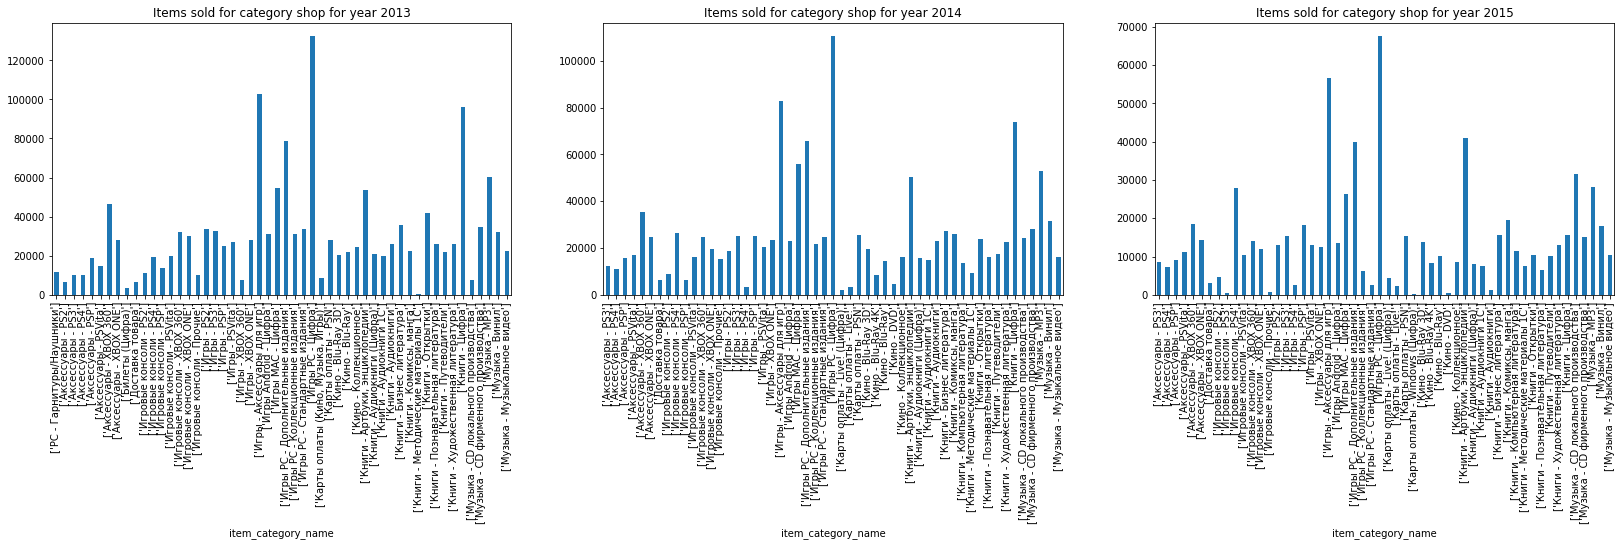

In [44]:
import numpy as np
fig, axs =plt.subplots(1,3)

for e,i in enumerate(np.arange(2013,2016,1)):
    fut[fut['date'].dt.year==i].groupby('item_category_name')['item_cnt_day'].sum().plot(kind='bar',ax=axs[e],figsize=(28,5),title='Items sold for category shop for year '+str(i))

<AxesSubplot:xlabel='item_category_name'>

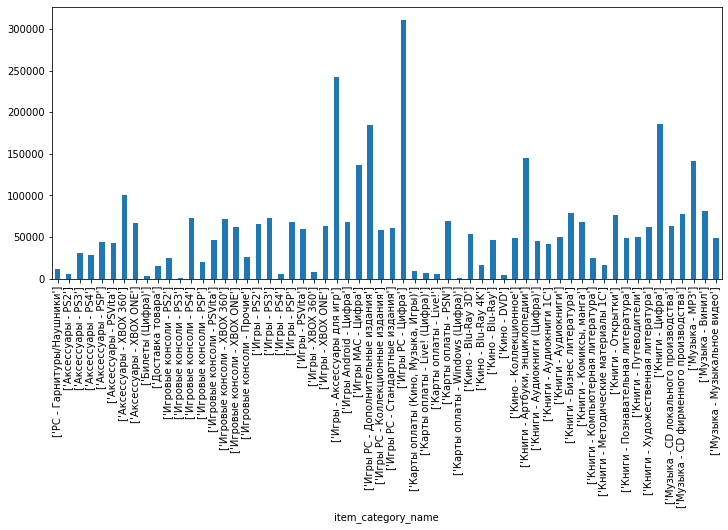

In [45]:
plt.figure(figsize=(12,5))
fut.groupby('item_category_name')['item_cnt_day'].sum().plot(kind='bar')

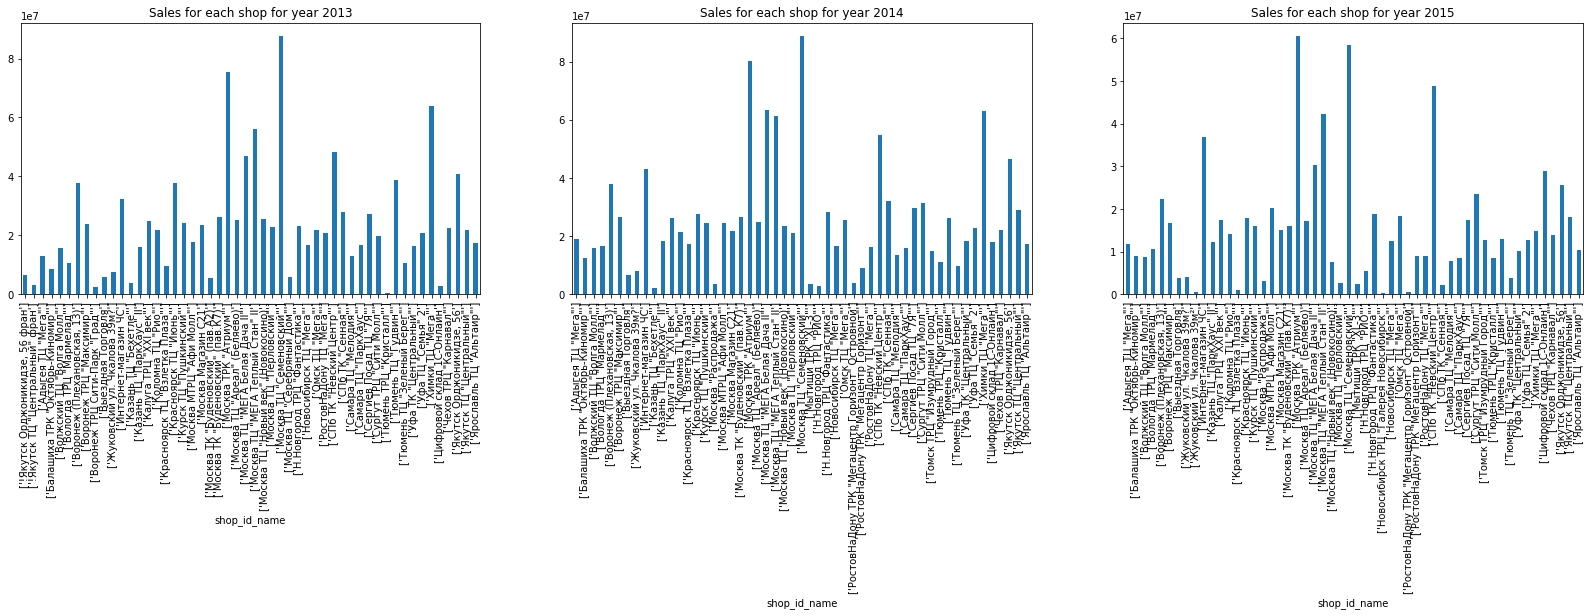

In [46]:
import numpy as np
fig, axs =plt.subplots(1,3)

for e,i in enumerate(np.arange(2013,2016,1)):
    fut[fut['date'].dt.year==i].groupby('shop_id_name')['revenue_each_item'].sum().plot(kind='bar',ax=axs[e],figsize=(28,5),title='Sales for each shop for year '+str(i))

<AxesSubplot:xlabel='shop_id_name'>

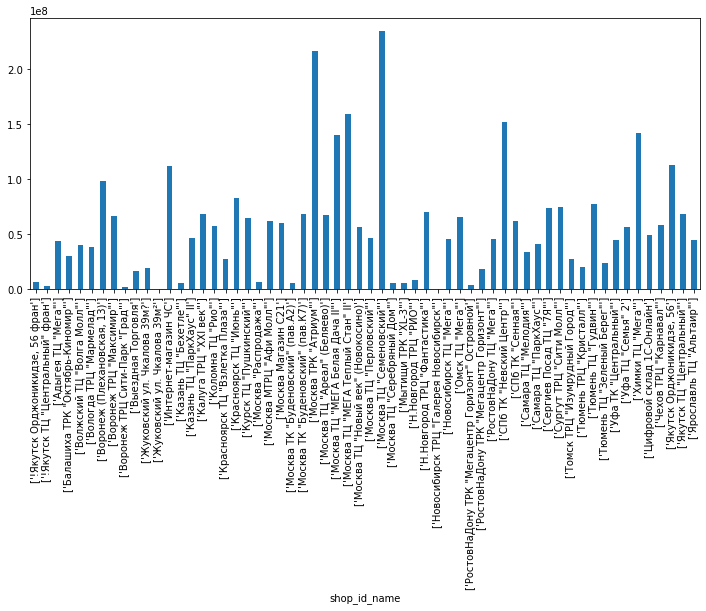

In [47]:
plt.figure(figsize=(12,5))
fut.groupby('shop_id_name')['revenue_each_item'].sum().plot(kind='bar')

<AxesSubplot:>

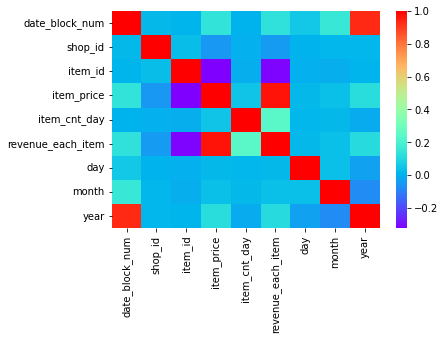

In [48]:
sns.heatmap(fut.corr(method='spearman'),cmap='rainbow')

<AxesSubplot:>

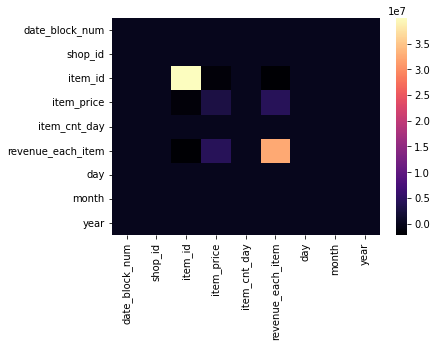

In [49]:
sns.heatmap(fut.cov(),cmap='magma')

# feature enginnering

In [50]:
#outlier item_cnt  prevent a biased model 
print(fut.values.shape)
fut.drop(fut[fut.item_price > 3 * fut.item_price.std()].index,axis=0, inplace = True)

fut.drop(fut[fut.item_cnt_day > 3 * fut.item_cnt_day.std()].index,axis=0, inplace = True)
# Sales? Items sold @ loss
fut.drop(fut[fut.item_price < 0].index,axis=0, inplace = True)
# remove times customer returns
fut.drop(fut[fut.item_cnt_day < 0].index,axis=0, inplace = True)

(2935843, 14)


In [51]:
fut.shape

(2878321, 14)

In [52]:
fut['item_category_id']=fut['item_category_id'].astype(str)
# we will choose to neglect the item category as relevant feature

In [53]:
dftrain=fut.loc[(fut['date_block_num']==10) | (fut['date_block_num']==22 )]

In [54]:
gdftrain=dftrain.groupby(['date_block_num','shop_id','item_id'],as_index=False).sum('item_cnt')

In [55]:
gdftrain1=gdftrain[['date_block_num','shop_id','item_id','item_cnt_day']]

In [56]:
X=gdftrain1
y=gdftrain1.pop('item_cnt_day')

In [57]:
testf.pop('ID')

0              0
1              1
2              2
3              3
4              4
           ...  
214195    214195
214196    214196
214197    214197
214198    214198
214199    214199
Name: ID, Length: 214200, dtype: int64

In [58]:
testf['date_block_num']=34
testf

,shop_id,item_id,date_block_num
0,5,5037,34
1,5,5320,34
2,5,5233,34
3,5,5232,34
4,5,5268,34
...,...,...,...
214195,45,18454,34
214196,45,16188,34
214197,45,15757,34
214198,45,19648,34


In [59]:
#dftrain = fut.groupby([fut['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()

# specifying the important attributes which we want to add to the data
#dftrain = dftrain[['date','item_id','shop_id','item_cnt_day']]

# at last we can select the specific attributes from the dataset which are important 
#dftrain = dftrain.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_day', fill_value = 0).reset_index()

In [60]:
#dftest=testf.merge(dftrain,on=['item_id','shop_id'],how='left')

In [61]:
#dftest=dftest.fillna(0.0)

In [62]:
#dftest

In [63]:
#x_train = dftest.drop(['2015-10', 'item_id', 'shop_id'], axis = 1)
#y_train = dftest['2015-10']

# deleting the first column so that it can predict the future sales data
#x_test = dftest.drop(['2013-01', 'item_id', 'shop_id'], axis = 1)

# checking the shapes of the datasets
#print("Shape of x_train :", x_train.shape)
#print("Shape of x_test :", x_test.shape)
#print("Shape of y_test :", y_train.shape)#

 for Random Forest the tuned hyperparameters :(best parameters)  {'ccp_alpha': 0.0, 'max_depth': 6, 'max_features': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'min_samples_split': 4}
 for Decision Tree the tuned hyperparameters :(best parameters)  {'ccp_alpha': 0.0, 'max_depth': 6, 'max_features': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}
 for Boosted the tuned hyperparameters :(best parameters)  {'ccp_alpha': 0.0, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}


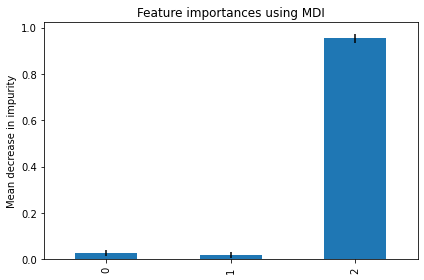

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#skf=KFold()

X_train,X_test,y_train,y_test=train_test_split(X.values,y.values)

names=[
    "Random Forest",
       "Decision Tree",
      "Boosted"
]

regressors=[
        RandomForestRegressor(),
            DecisionTreeRegressor(),
           GradientBoostingRegressor()
]

massiveCV=
{
          
        'Decision Tree':{'max_depth':[4,5,6],'min_samples_split':[2,4,5,7],'ccp_alpha':[0.0,0.02,0.5,1.0],
                           'min_samples_leaf':[1,2,4,5],'max_leaf_nodes':[5,8,12,15,None],'max_features':[1,2,3]},
          
        'Random Forest':{'max_depth':[4,5,6],'min_samples_split':[2,4,5,7],'ccp_alpha':[0.0,0.02,0.5,1.0],
                          'min_samples_leaf':[1,2,4,5],'max_leaf_nodes':[5,8,12,15,None],'max_features':[1,2,3]},
          
        'Boosted':{'max_depth':[4,5,6],'min_samples_split':[2,4,5,7],'ccp_alpha':[0.0,0.02,0.5,1.0],
                        'min_samples_leaf':[1,2,4,5],'max_features':[1,2,3]}
}

models=[]
msetrain=[]
msetest=[]
fig, ax = plt.subplots()
for name, clf in zip(names, regressors):
   # for (train, test), i in zip(skf.split(X,y),range(0,5)):
    gcv=GridSearchCV(clf,massiveCV[name],cv=4)
        
    gcv.fit(X_train,y_train)
    
    print(" for "+name+" the tuned hyperparameters :(best parameters) ",gcv.best_params_)
    
        
    msetrain.append(np.sqrt((1/len(y_train))*np.dot(gcv.predict(X_train),(-1)*y_train.reshape(-1,1))**2))
        # strat k fold cross val
    msetest.append(np.sqrt((1/len(y_test))*np.dot(gcv.predict(X_test),(-1)*y_test.reshape(-1,1))**2))
    models.append(gcv)
        
    if name == 'Random Forest':
        blf=RandomForestRegressor(**gcv.best_params_,warm_start=True)
        blf.fit(X_train,y_train)
        importances = blf.feature_importances_
        std = np.std([tree.feature_importances_ for tree in blf.estimators_], axis=0)
        forest_importances = pd.Series(importances)
        #clf_err = 1 - blf.oob_score_
        forest_importances.plot.bar(yerr=std,ax=ax)
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        #xs, ys = zip(*clf_err)
       # ax[1].plot(xs, ys)
        fig.tight_layout()

msetrain=np.array(msetrain)
msetrain.shape=(1,len(names))
resmsetrain=pd.DataFrame(msetrain)
resmsetrain.columns=names
#resmsetrain.index=["KFold for "+str(f) for f in resmsetrain.index ]


msetest=np.array(msetest)
msetest.shape=(1,len(names))
resmsetest=pd.DataFrame(msetest)
resmsetest.columns=names
#resmsetest.index=["KFold for "+str(f) for f in resmsetest.index ]


In [82]:
msetrain

array([[2628.81801278, 2653.68337172, 3438.64387971]])

In [83]:
msetest

array([[1547.41478278, 1557.41325934, 1906.20918433]])

In [84]:
models

[GridSearchCV(cv=4, estimator=RandomForestRegressor(),
              param_grid={'ccp_alpha': [0.0, 0.02, 0.5, 1.0],
                          'max_depth': [4, 5, 6], 'max_features': [1, 2, 3],
                          'max_leaf_nodes': [5, 8, 12, 15],
                          'min_samples_leaf': [1, 2, 4, 5],
                          'min_samples_split': [2, 4, 5, 7]}),
 GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
              param_grid={'ccp_alpha': [0.0, 0.02, 0.5, 1.0],
                          'max_depth': [4, 5, 6], 'max_features': [1, 2, 3],
                          'max_leaf_nodes': [5, 8, 12, 15],
                          'min_samples_leaf': [1, 2, 4, 5],
                          'min_samples_split': [2, 4, 5, 7]}),
 GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
              param_grid={'ccp_alpha': [0.0, 0.02, 0.5, 1.0],
                          'max_depth': [4, 5, 6], 'max_features': [1, 2, 3],
                          'min_samples_leaf': [1

In [85]:
kagglepred=models[0].predict(testf.values)